In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns


In [22]:
# Read in the CSV and JSON data frames
csv_df = pd.read_csv('Part1+-+Car-Attributes.csv')
json_df = pd.read_json('Part1+-+Car-Attributes.json')

# Merge the data frames
merged_df = pd.merge(csv_df, json_df)
print(merged_df)
# Calculate the 5-point summary
five_point_summary = merged_df.describe()


   Unnamed: 0   mpg  cyl   disp hp    wt   acc  yr  origin
0          32  25.0    4   98.0  ?  2046  19.0  71       1
1         126  21.0    6  200.0  ?  2875  17.0  74       1
2         330  40.9    4   85.0  ?  1835  17.3  80       2
3         336  23.6    4  140.0  ?  2905  14.3  80       1
4         354  34.5    4  100.0  ?  2320  15.8  81       2
5         374  23.0    4  151.0  ?  3035  20.5  82       1


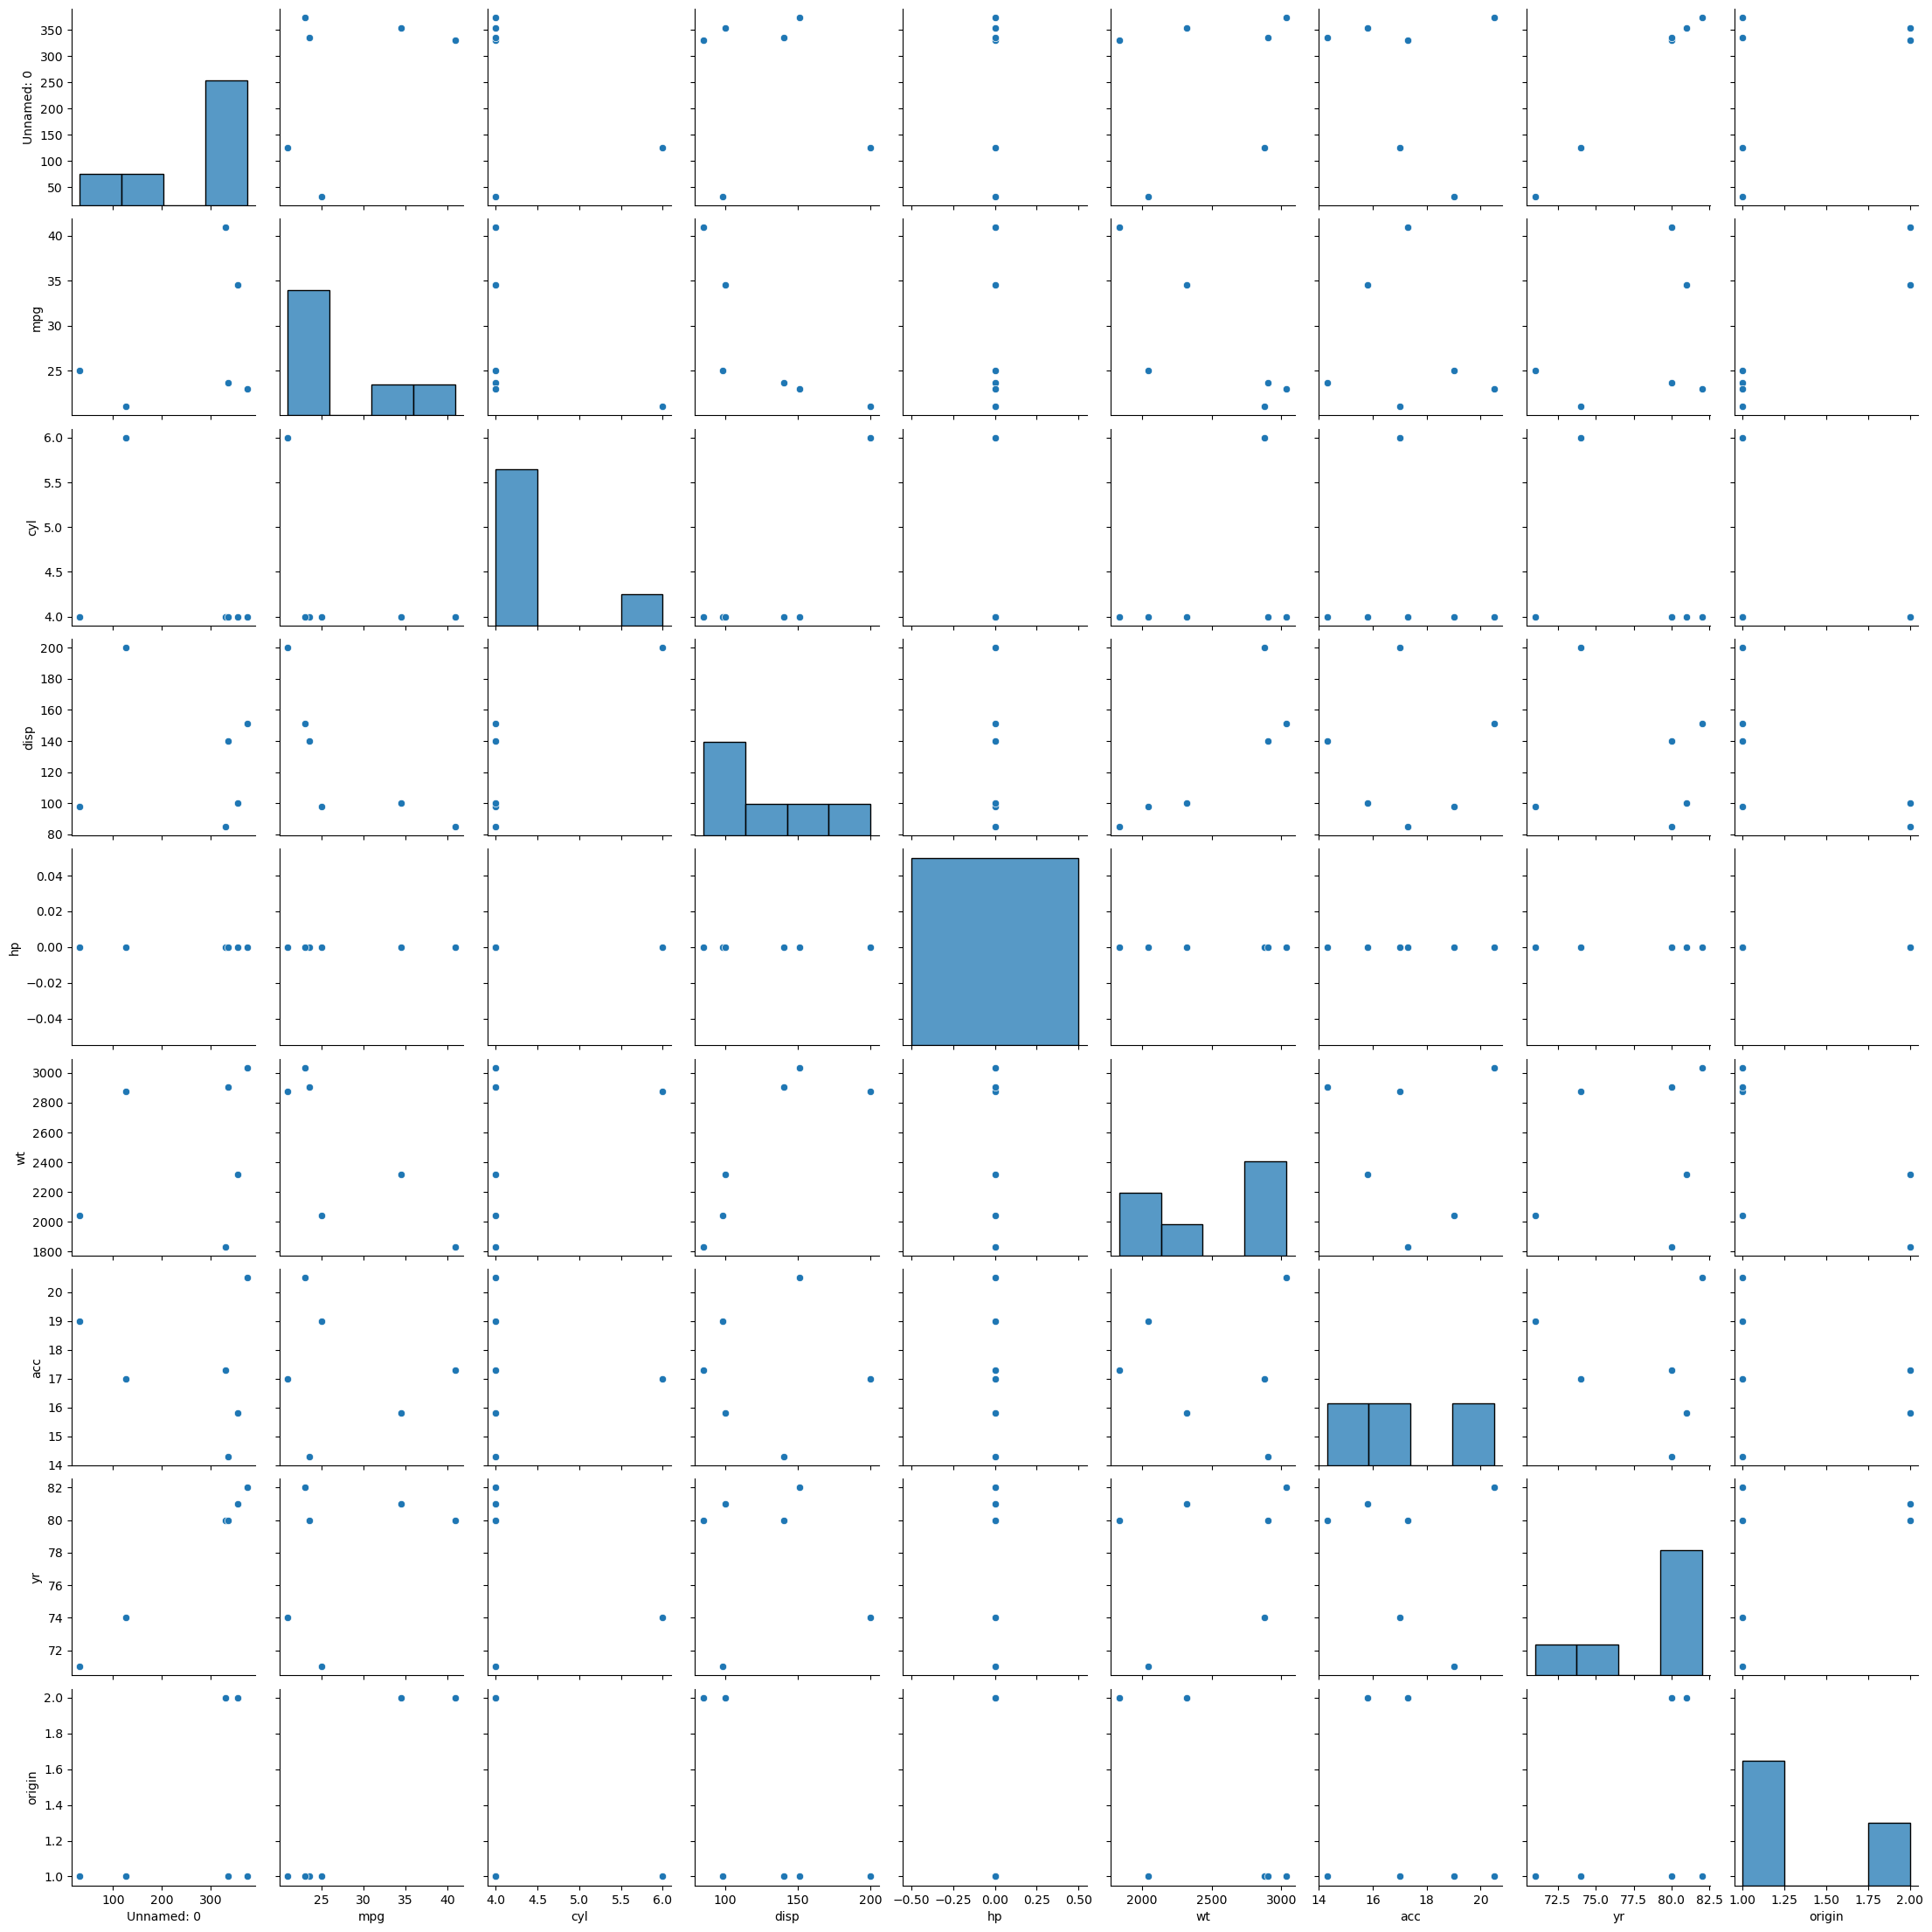

In [23]:
# Check for missing values and impute
missing_values = merged_df.isnull().sum()
percentage_missing = missing_values / len(merged_df) * 100
merged_df = merged_df.fillna(method='ffill')

# Check for duplicates and impute
duplicates = merged_df.duplicated()
merged_df = merged_df.drop_duplicates()
merged_df = merged_df.replace('?',0.0)

# Plot pairplot
sns.pairplot(merged_df)


<Axes: xlabel='wt', ylabel='disp'>

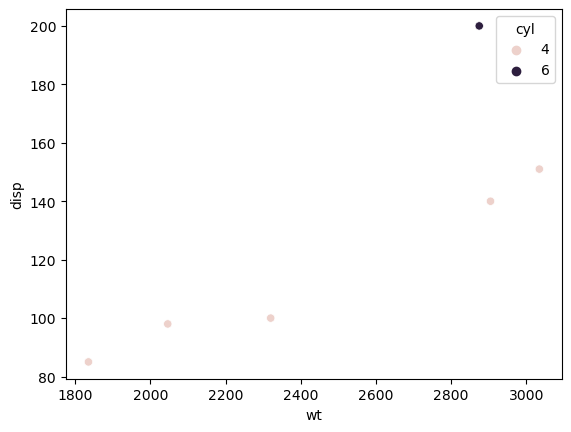

In [24]:
sns.scatterplot(x=merged_df['wt'],y=merged_df['disp'],hue=merged_df['cyl'])

C:\Users\Pavan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Pavan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Pavan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Pavan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

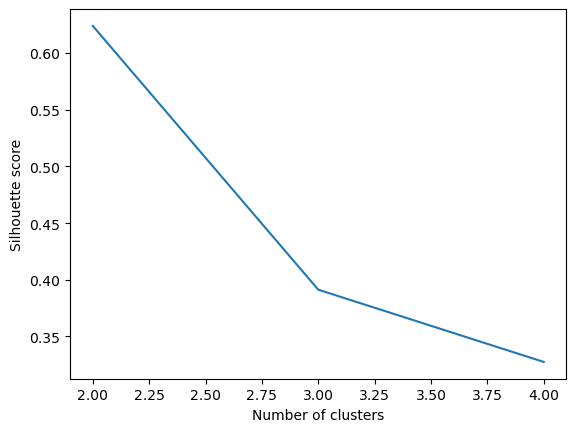

In [25]:
# Perform k-means clustering
scores = []
for k in range(2,5):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(merged_df)
    scores.append(silhouette_score(merged_df, kmeans.predict(merged_df)))
    
# Find elbow point
plt.plot(range(2,5), scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

From the Elbow method, it is found to Number of clusters =3 for clustering.

In [41]:
# Train model on k-means clustering with optimal number of clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(merged_df)
labels = kmeans.labels_
print(labels)
merged_df['cluster'] = labels

C:\Users\Pavan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Pavan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[2 1 2 1 0 1]


In [55]:
# Classify new datapoint
new_data = pd.DataFrame({'feature1': [0,1,2], 'feature2': [0,1,2]})
new_cluster = KMeans(n_clusters=3)
kmeans.fit(new_data)
cluster_label=kmeans.predict(new_data)[0]
print("New datapoint belongs to cluster:", cluster_label)
#print(cluster_label)

C:\Users\Pavan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Pavan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


New datapoint belongs to cluster: 2
